## **TensorFlow Core Learning Algorithms**

This notebook contains info about 4 funcdamental machine learning algorithms. we will apply each of these algorithm to unique problems and database before highlighting the use cases of each.

#### The algorithms we will focus on include :
- Linear Regression
- Classification
- Clustering
- Hidden Markov Model

it is worth noting that there are many tools within tensorflow that could be used to solve the problems we will see below. some tools that will give the most variety and are easiest to use.

### **Linear Regression**

Linear Regression is one of the most basic forms of machine learning and is used to predict numeric values.

In this , we will use linear model to predict the survival rate of passengers from titanic dataset.

### How it Works

Before we dive in i will provide a very surface level explanation of the linear algorithm.

Linear regression follows a very simple concept . if data points are related linearly we can generate **a line of bestfit** for these points and use it to predict future values.

Lets take an example of data set with one feature and one label.

In [33]:
from __future__ import absolute_import , division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output # Just for showing Output.
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

### **Data**

data is the major part of machine learning ,In fact it's so important that most of what we will be focus on , cleaning and selecting appropriate data.

The dataset we wil be following in here is the **titanic dataset** . it has tons of information about each passager on the ship. Ou first step is always to understand the data and explore it.

In [34]:
# Load dataset.

#training data 
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')

# Testing data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


The **pd.read_csv()** method will return to us a new pandas dataframe. You can think of a dataframe like a table. In fact we can actually have a look at the table representation.

We've decided to pop the "survived" column form our dataset and store it in a varaible. this Column simply tells us if the person survivied or not.

To Look at the data we'll use the **.head()** method from pandas . this will show us 5 times in our dataframe.

In [35]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [36]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [37]:
y_train.head() ,y_eval.head()

(0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64,
 0    0
 1    0
 2    1
 3    1
 4    1
 Name: survived, dtype: int64)

In [38]:
dftrain.loc[0],dfeval.loc[0]

(sex                          male
 age                          22.0
 n_siblings_spouses              1
 parch                           0
 fare                         7.25
 class                       Third
 deck                      unknown
 embark_town           Southampton
 alone                           n
 Name: 0, dtype: object,
 sex                          male
 age                          35.0
 n_siblings_spouses              0
 parch                           0
 fare                         8.05
 class                       Third
 deck                      unknown
 embark_town           Southampton
 alone                           y
 Name: 0, dtype: object)

In [39]:
dftrain['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

In [40]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [41]:
dftrain.shape

(627, 9)

so , above says it have 627 entires and 9 features

<AxesSubplot:>

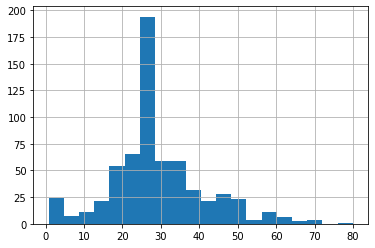

In [42]:
dftrain.age.hist(bins=20)

In [43]:
dftrain.sex.value_counts()

male      410
female    217
Name: sex, dtype: int64

<AxesSubplot:>

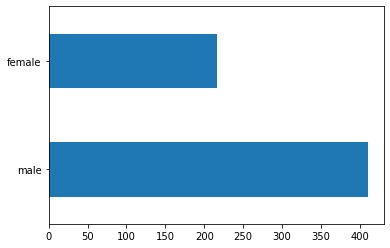

In [44]:
dftrain.sex.value_counts().plot(kind="barh")

<AxesSubplot:>

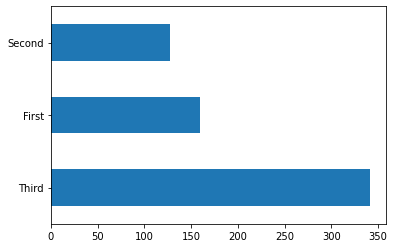

In [45]:
dftrain['class'].value_counts().plot(kind="barh")

In [46]:
pd.concat([dftrain , y_train] , axis=1).head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0


In [47]:
pd.concat([dftrain , y_train] , axis=1).head().groupby('sex').survived.mean()

sex
female    1.0
male      0.0
Name: survived, dtype: float64

<AxesSubplot:ylabel='sex'>

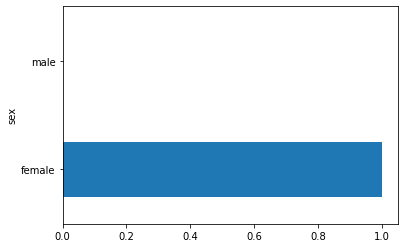

In [48]:
pd.concat([dftrain , y_train] , axis=1).head().groupby('sex').survived.mean().plot(kind='barh')

Text(0.5, 0, '% survive')

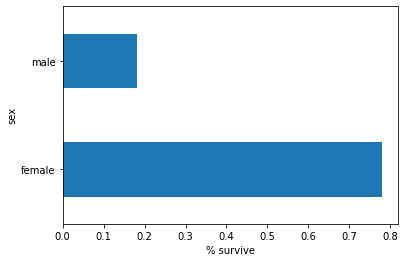

In [49]:
pd.concat([dftrain , y_train] , axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

After analyzing this inforamtion we should notice the following :

- The majority of passengers are in their 20s or 30s.
- The majority of passengers are male.
- The majority of passengers are in 'Thrid' Class.
- Females have a much higer chance of survival

### Training vs Testing Data

You may have noticed that we loaded two different datasets above. This is because whe we trian models we need two sets of data:

The **training** data is what we feed to the model so that it can develop and learn . it is usually a much larger size than the testing data.

The **testing** data is what we use to evaluate the model and see how well it is performing . we must use a separate set of data that the model has not been trianed on to evaluate it. CAn you think of why this is ?

Well , the point of our model is to be able to make predictions on NEW data, data that we never seen before. if we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be separated.

In [50]:
dftrain.shape,dfeval.shape

((627, 9), (264, 9))

**What is Categorical data ?**

**Answer** : **Categorical data** is the data which is not numeric and has different categories, there is going to be like a specific set of different categories in a dataset.

We change these categorical data into numeric data somehow since, model does not know about these strign data instead numeric data.

### **Features Columns**

In our dataset we have two different kinds of information : 
- Categorical
- Numeric

Our **categorical data** is anything that is not numeric! For example, the sex column does not use numbers, it use numbers , it uses words "male" and "female".

Before we continue and create/train a model we must convert our categories data into numeric data. We can do this by encoding each category with an integer(ex: male=1 , female=2)

Fortunately for us TensorFLow has some tools to help!

In [51]:
CATEGORICAL_COLUMNS = ['sex' , 'n_siblings_spouses','parch' , 'class' , 'deck' , 'embark_town','alone']

NUMERIC_COLUMNS = ['age' , 'fare']


In [52]:
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS :
#     gets a list of all unique values from given feature column
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name , vocabulary))

for feature_name in NUMERIC_COLUMNS :
    feature_columns.append(tf.feature_column.numeric_column(feature_name , dtype=tf.float32))


print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [53]:
s = pd.DataFrame(feature_columns)
s

,key,vocabulary_list,dtype,default_value,num_oov_buckets
0,sex,"(male, female)",<dtype: 'string'>,-1,0.0
1,n_siblings_spouses,"(1, 0, 3, 4, 2, 5, 8)",<dtype: 'int64'>,-1,0.0
2,parch,"(0, 1, 2, 5, 3, 4)",<dtype: 'int64'>,-1,0.0
3,class,"(Third, First, Second)",<dtype: 'string'>,-1,0.0
4,deck,"(unknown, C, G, A, B, D, F, E)",<dtype: 'string'>,-1,0.0
5,embark_town,"(Southampton, Cherbourg, Queenstown, unknown)",<dtype: 'string'>,-1,0.0
6,alone,"(n, y)",<dtype: 'string'>,-1,0.0
7,age,"(1,)",None,<dtype: 'float32'>,NaN
8,fare,"(1,)",None,<dtype: 'float32'>,NaN


### The Training Process

So, we are almost done preparing our dataset and i feel as though it's a good time to explain how our model is trained.Specifically how input data is fed to our model.

For thsi specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply batches of entires. We will actually feed feed these batches to our model multiple times according to the number of **epoches**.

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. we use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it. But in these multiple epochs ,we feed the same data in different order because as we feed data to model the very first line of bestfit is quite weird or unaccurate so, we feed it multiple times to make that line of bestfit more accurate and better.

Ex. if we have 10 epochs , our model will see the same dataset 10 times.

Since, we need to feed our data in batches and multiple times we need to create something called an input function. The input function simply defines how our dataset will be converted into batches at each epoch.


### **Input Function**

The Tensorflow model we are going to use requires that data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current pandas dataframe into that object.

This is seemigly complicated input function, this is straight form the TensorFlow Documentation <a href="https://www.tensorflow.org/tutorials/estimator/linear">Click here</a>

In [54]:
def make_input_fn(data_df , label_df , num_epochs=10, shuffle=True , batch_size=32):
    def input_function(): #inner function, this will be returned
        # Create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle :
            ds = ds.shuffle(1000) #random order of data
        ds = ds.batch(batch_size).repeat(num_epochs)#split dataset into batches of 32 and repeat process for number of epochs
        return ds # return a batch of dataset
    return input_function # return a function object for use

# here we will call the input function that was return to us to get a data
train_input_fn = make_input_fn(dftrain , y_train) 
eval_input_fn = make_input_fn(dfeval , y_eval , num_epochs=1 , shuffle=False)


### Creating the model

In this , we are going to use a linear estimator to utilize the linear regression algorithm.

Creating one is actually pretty easy! have a look below :

In [55]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# we create a linear estimator by passing the feature columns we created earlier.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\india\\AppData\\Local\\Temp\\tmpm18ely9b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [56]:
linear_est.train(train_input_fn) #train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data

clear_output() # it clears the console output
print(result['accuracy']) # the result varaible is simply a dict of stats about our model
print(result)

0.7310606
{'accuracy': 0.7310606, 'accuracy_baseline': 0.625, 'auc': 0.81943685, 'auc_precision_recall': 0.76004285, 'average_loss': 0.5844327, 'label/mean': 0.375, 'loss': 0.586176, 'precision': 0.6076923, 'prediction/mean': 0.5310714, 'recall': 0.7979798, 'global_step': 200}


In [57]:
#predicting from model/result
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print("Chance of Survival : ",result[4]['probabilities'][1])
print("Chance of not Survival : ",result[4]['probabilities'][0])


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\india\AppData\Local\Temp\tmpm18ely9b\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
Chance of Survival :  0.47066766
Chance of not Survival :  0.5293323


### **Classification**

Now that we've covered linear regression it is time to talk about classification . Where regression was used to predict a numeric value.
Classification is used to separate data points into classes of different labels.In this example , we will use a tensorFlow estimator to classify flowers.

Since we've touched on how estimators work earlier we're going a bit quicker though this example.

This section is based on following tensorflow website : 
<a href="https://www.tensorflow.org/tutorials/estimator/premade">https://www.tensorflow.org/tutorials/estimator/premade</a>


### **Import and Setup**

In [58]:
from __future__ import absolute_import , division , print_function , unicode_literals

import pandas as pd
import tensorflow as tf

### Dataset

This specific dataset separates flowers into 3 different classes of species
- Setosa
- Versicolor
- Virginica

The information about each flower is the following :
- sepal length
- sepal width
- petal length
- petal width

In [59]:
# Now defining CSV column name and species
CSV_COLUMN_NAMES = ['SepalLength' , 'SepalWidth' , 'PetalLength' , 'PetalWidth' , 'Species']
SPECIES = ['Setosa' , 'Versicolor' , 'Virginica']

In [60]:
# Defining some constant to help us later on

# it will save the CSV file from link and named it as "iris_training.csv"
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

# it will save the CSV file from link and named it as "iris_test.csv"
test_path = tf.keras.utils.get_file(
    "iris_test.csv" , "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path , names=CSV_COLUMN_NAMES , header=0)
test = pd.read_csv(test_path , names=CSV_COLUMN_NAMES , header=0)
# Here we use keras (a module inside of tensorFlow) to grab our datasets and read them into a pandas dataframe

In [61]:
# Here is our data
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [62]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [63]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.9,3.0,4.2,1.5
1,6.9,3.1,5.4,2.1
2,5.1,3.3,1.7,0.5
3,6.0,3.4,4.5,1.6
4,5.5,2.5,4.0,1.3


In [64]:
train.shape # now , train have 120 entries and 4 features

(120, 4)

In [65]:
test.shape # it have 30 entries and 4 features

(30, 4)

In [66]:
# INPUT FUNCTION

def input_fn(features , labels , training=True , batch_size=256):
    # Convert the inputs to Dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features) , labels))
    
    #  Shuffle and repeat if you are in training mode
    if training : 
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)


In [67]:
# Featues columns describe how to use the input

my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
# print(my_feature_columns)

##  Building The Model

Now, we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from Some Options listed below :
- DNNClassifier (Deep Neural Network)
- LinearClassifier

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear correspondence in our data.

so, Let build our model!

In [68]:
# Building Model
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns,
                                    # Two diffen layers of 30 and 10 nodes respectively.
                                       hidden_units=[30,10],
                                    # The model must choose between 3 classes.
                                       n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\india\\AppData\\Local\\Temp\\tmphbpt2jcs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [69]:
# Now , Training Model
classifier.train(
    # we include lambda to avoid creating an inner function previously.
    input_fn=lambda: input_fn(train , train_y ,training=True),
    steps=5000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\india\AppData\Local\Temp\tmphbpt2jcs\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.4874941, step = 0
INFO:tensorflow:global_step/sec: 177.22
INFO:tensorflow:loss = 0.97760516, step = 100 (0.565 sec)
INFO:tensorflow:global_step/sec: 314.266
INFO:tensorflow:loss = 0.87034404, step = 200 (0.333 sec)
INFO:tensorflow:global_step/sec: 270.125
INFO:tensorflow:loss = 0.8147954, step = 300 (0.358 sec)
INFO:tensorflow:global_step/sec: 285.267
INFO:tensorflow:loss = 0.74618286, step = 400 (0.350 sec)
INFO:tensorflow:global_step/sec: 295.666
INFO:tensorflow:loss = 0.7224504

The only thing to explain here is the **steps** arguemnt. This simply tells 
the classifier to run 5000 steps. Try modifying this and seeing if your results
change.Keep in mind that more is not always better

### **Evaluation**

Now, lets see how this trained model does!

In [70]:
eval_result = classifier.evaluate(
    input_fn = lambda: input_fn(test , test_y , training=False)
)
print("\nTesting set accuracy : {accuracy:0.3f}\n".format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-25T18:09:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\india\AppData\Local\Temp\tmphbpt2jcs\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.56126s
INFO:tensorflow:Finished evaluation at 2022-02-25-18:09:56
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.96666664, average_loss = 0.32458597, global_step = 5000, loss = 0.32458597
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\india\AppData\Local\Temp\tmphbpt2jcs\model.ckpt-5000

Testing set accuracy : 0.967



**Notice :** This time we didn't specifiy the number of steps. This is because during evaluation the model will only look at the testing data one time.

### **Predictions**

Now that we have a trained model it's time to use it to make predictions.Below is a script that allows you to type features of a flower and see a prediction for its class.

In [71]:
def input_fn(features , batch_size=256):
    # Convert the inputs to a Dataset without labels.
    print(features)
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength' , 'SepalWidth' , 'PetalLength' , 'PetalWidth']
predict = {}

# In this code space script is used to predict what kind of Species below data is.
labels = [2.4,2.6,6.5,6.3]

for i in range(0,4) :
    print(features[i])
    predict[features[i]] = [float(labels[i])]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions :
    print(pred_dict)
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print("prediction is '{}' ({:.1f}%)".format(SPECIES[class_id],100*probability))


SepalLength
SepalWidth
PetalLength
PetalWidth
{'SepalLength': [2.4], 'SepalWidth': [2.6], 'PetalLength': [6.5], 'PetalWidth': [6.3]}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\india\AppData\Local\Temp\tmphbpt2jcs\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-7.3103437, -2.5219896,  6.481322 ], dtype=float32), 'probabilities': array([1.0240041e-06, 1.2298660e-04, 9.9987602e-01], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
prediction is 'Virginica' (100.0%)


In [72]:
# Here is some example input and expected classes you can try alone
expected = ['Setosa' , 'Versicolor' , 'Virginica']
predict_x = {
    'SepalLength' : [5.1,5.9,6.9],
    'SepalWidth' : [3.3,3.0,3.1],
    'PetalLength' : [1.7,4.2,5.4],
    'PetalWidth' : [0.5,1.5,2.1],
}

prediction = classifier.predict(input_fn = lambda : input_fn(predict_x))
for predict in prediction:
    class_id = predict['class_ids'][0]
    print(predict['probabilities'])
    print(expected[class_id]," expectation/probability : ",predict['probabilities'][class_id])

{'SepalLength': [5.1, 5.9, 6.9], 'SepalWidth': [3.3, 3.0, 3.1], 'PetalLength': [1.7, 4.2, 5.4], 'PetalWidth': [0.5, 1.5, 2.1]}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\india\AppData\Local\Temp\tmphbpt2jcs\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0.86103874 0.13377796 0.00518334]
Setosa  expectation/probability :  0.86103874
[0.07022008 0.62236595 0.30741394]
Versicolor  expectation/probability :  0.62236595
[0.00521415 0.27968928 0.7150966 ]
Virginica  expectation/probability :  0.7150966


## **Clustering**

Now that we've covered regression and classification it's time to talk about clustering data!

Clustering is unsupervised Machine Learning technique that involves the grouping of data points. Clustering only works for a very specific problems.And we use clustering, when you have bunch of input informationor features, you don't have any labels or open information. In theory , data points that are in the same group should have similar properties and /or features , while data points in different groups should have highly dissimilar properties and/or features.

<a href="https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68">Link to view</a>

Unfortunatly ,  there are issue with the current version of TensorFlow and the implementation for KMeans. This menas we cannot use Kmeans without writing the algorthm from scratch. We aren't quite at that level yet so we'll jsut explain the basics of clustering for now.

**Basic Algorithm for KMeans**
- Step 1 : Randomly pick K points toplace K centroids.
- Step 2 : Assign all of the data points to centroids by distance. Th closest centroid to a point is the one it is assigned to.
- Step3 : Average all of the points belong to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step4 : Reassign every point once again to the closest centroid.
- Step5 : Repeat step3-4 until no point changes which centroid it belong to.

## **Hidden Markov Models**

*The Hidden Markov Model* is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution. Transition among the states are governed by a set of probabilities called *Transition Probability*.<br> <a href="http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html">http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html</a>

A hidden markov model works with probabilities to predict future events or states. In this section we will know how to create a hidden markov model that can predict the weather (weather forecasting).

This is from below Tensor flow tutorial : <br>
<a href="https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel">https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel</a>

## **Data**

Lets start by discussing the type of data we use when we work with a hidden markov model.

For Hidden Markov Model , we are only interested in probability distributions that have to do with states.previously ,we worked with large datasets og 100s of different entires. For a markov model we are only interested in probability distribution tha have to do with states. In markov model , we don't need 100s of data entires in fact , all we need is just constant values for probability and transition distribution and observation distributions.

we can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up , nut lets discuss the components of a markov model.

**States :** In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red" , "green" and "blue". These states are "hidden" within the model , which means we do not directly observe them.

**Observations :** Each state has a particular outcome or observation assciated with it based on a probability distribution. An example of this is the following : *On a hot day Jimmy has a 80% chance of being happy and a 20% chance of being sad.*

**Transitions :** Each state will have a probabilty defining the likelyhood of transitioning to a different state. An example is the following : *a cold day has 30% chance of being followed by a hot day and 70% chance of being followed by another cold day.*

TO create a hidden markov model we need :
- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on agiven day .

In [9]:
!pip install --upgrade tensorflow-probability

In [10]:
import tensorflow_probability as tfp # we are using a different module from tensorflow this time
import tensorflow as tf

## **Weather Model**

Taken directly from the TensorFlow documentation 
(<a href="https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel">https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel</a>)

We will model a simple weather system and try to predict the temperature on each day given the following information :
1. Cold days are encoded by a 0 and hot days encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

If you are unfamiliar with standard deviation it can be put simply as the range of expected values.

In this example , on a hot day the average temperature is 15 to 25.

To model this in TensorFlow we will do the following :

In [22]:
tfd = tfp.distributions #loading tensorflow distribution probability module

# A simple weather model.

# Represent a cold day with 0 and a hot day with 1.
# Suppose the first day of a sequence has a 0.8 chance of being cold.
# We can model this using the categorical distribution:

# we will get temperature as ascending order b/c we started from  cold day.
initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) # Refer to point 2 above

# Suppose a cold day has a 30% chance of being followed by a hot day
# and a hot day has a 20% chance of being followed by a cold day.
# We can model this as:

transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])# refers to points 3 and 4

# Suppose additionally that on each day the temperature is
# normally distributed with mean and standard deviation 0 and 5 on
# a cold day and mean and standard deviation 15 and 10 on a hot day.
# We can model this with:

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.]) #refer to point 5 above
# the loc argument represents the mean and scale is the standard deviation.

We've now created distributed variables to model our system and its time to create the hidden markov model.

In [23]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7
)

The number of steps represents the number of days that we would like to predict inforamtion for . In this case, we've choosen 7 , an entire week.

To get the **expected temperature** on each day we can do the following :

In [24]:
mean = model.mean() #mean of partially defined tensor

# due to the way Tensorflow works on a lower level we need to evaluate part of the graph.
# from within a session to see the value of this tensor.

# in the new version of tensorflow we need to use tf.compact.v1.Session() rather than just tf.Session
with tf.compat.v1.Session() as sess:
    print(mean.numpy()) # this gives temperature on each 7 days.

[2.9999998 5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ]
